In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [3]:

# Read data
train_data = pd.read_csv("train.csv")
print(train_data.head())
test_data=pd.read_csv("test.csv")




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Store test PassengerIds for later use
test_passenger_ids_coloumn = test_data["PassengerId"]



In [5]:
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# check nulls
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


#fill null age values
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

#fill embarked values
print(train_data['Embarked'].mode())
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


train_data.head()

0    0.0
Name: Embarked, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [2]:
## Check the correlational coefficiency

In [9]:
train_data1=train_data.describe()
corr_matrix=train_data1
corr_matrix.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.521032,0.522038,0.521033,0.579152,0.525557,0.523936,0.768955,0.521664
Survived,0.521032,1.000000,0.999997,1.000000,0.997188,0.999971,0.999983,0.854290,0.999999
Pclass,0.522038,0.999997,1.000000,0.999997,0.997271,0.999969,0.999981,0.854411,0.999996
Sex,0.521033,1.000000,0.999997,1.000000,0.997188,0.999971,0.999983,0.854293,0.999999
Age,0.579152,0.997188,0.997271,0.997188,1.000000,0.997658,0.997524,0.886592,0.997257
SibSp,0.525557,0.999971,0.999969,0.999971,0.997658,1.000000,0.999998,0.858250,0.999978
Parch,0.523936,0.999983,0.999981,0.999983,0.997524,0.999998,1.000000,0.857221,0.999989
Fare,0.768955,0.854290,0.854411,0.854293,0.886592,0.858250,0.857221,1.000000,0.854858
Embarked,0.521664,0.999999,0.999996,0.999999,0.997257,0.999978,0.999989,0.854858,1.000000


In [4]:
## visualize the data for geeting the idea about the data(histogram)

In [10]:
import matplotlib.pyplot as plt

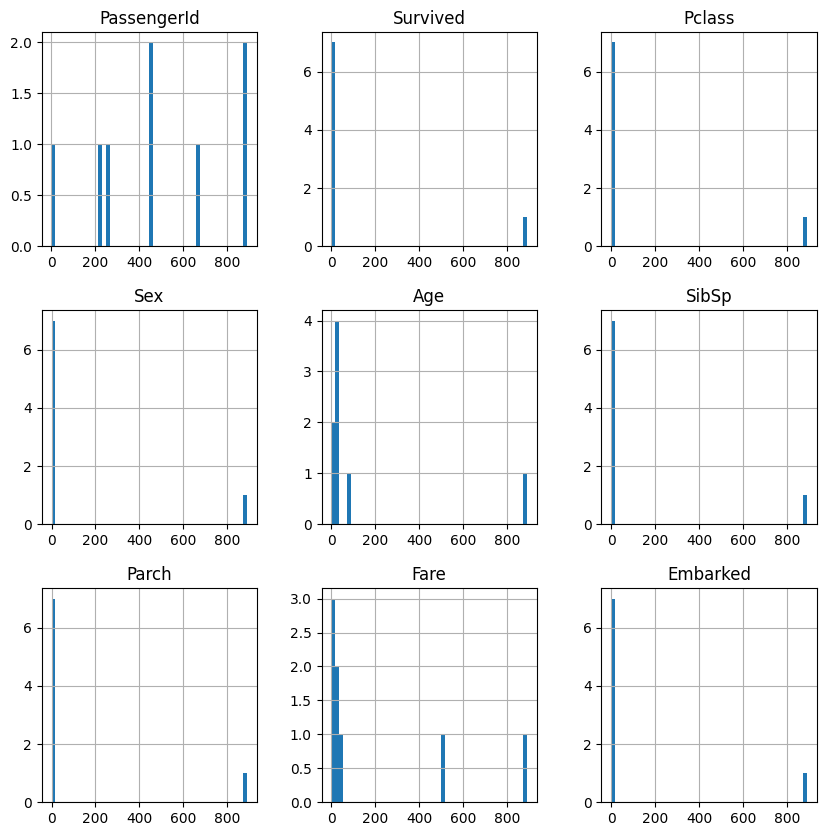

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data1.hist(bins=50, figsize=(10,10))
plt.show()

array([[<Axes: xlabel='PassengerId', ylabel='PassengerId'>,
        <Axes: xlabel='Survived', ylabel='PassengerId'>,
        <Axes: xlabel='Pclass', ylabel='PassengerId'>,
        <Axes: xlabel='Sex', ylabel='PassengerId'>,
        <Axes: xlabel='Age', ylabel='PassengerId'>,
        <Axes: xlabel='SibSp', ylabel='PassengerId'>,
        <Axes: xlabel='Parch', ylabel='PassengerId'>,
        <Axes: xlabel='Fare', ylabel='PassengerId'>,
        <Axes: xlabel='Embarked', ylabel='PassengerId'>],
       [<Axes: xlabel='PassengerId', ylabel='Survived'>,
        <Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Sex', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='Embarked', ylabel='Survived'>],
       [<Axes: xlabel='PassengerId', 

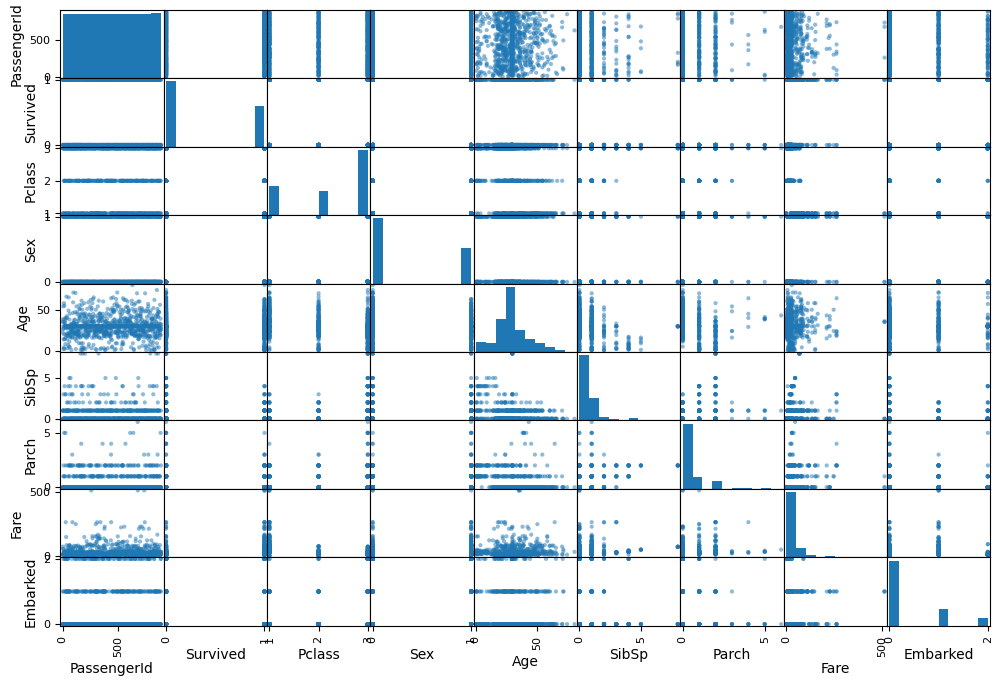

In [63]:
from pandas.plotting import scatter_matrix

attribute= ["PassengerId","Survived", "Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

scatter_matrix(train_data[attribute], figsize=(12,8))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
label= train_data.Survived.copy()
train_data_set = train_data.drop(['Name','Ticket','Survived','Cabin'], axis=1)
print(train_data_set.head())
# Splitting train set into  the trainning and validation set
X_train, X_test, y_train, y_test = train_test_split(train_data_set, label, test_size = 0.2, random_state=123)

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    0  22.0      1      0   7.2500       0.0
1            2       1    1  38.0      1      0  71.2833       1.0
2            3       3    1  26.0      0      0   7.9250       0.0
3            4       1    1  35.0      1      0  53.1000       0.0
4            5       3    0  35.0      0      0   8.0500       0.0


In [14]:
corr_matrix["Survived"].sort_values(ascending=False)

count    891.000000
75%        1.000000
max        1.000000
std        0.486592
mean       0.383838
min        0.000000
25%        0.000000
50%        0.000000
Name: Survived, dtype: float64

In [15]:
# Recheck nulls
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
Dt_clf = DecisionTreeClassifier()
Rf_clf = RandomForestClassifier()
LR_clf = LogisticRegression()

In [18]:
Dt_clf.fit(X_train, y_train)
Rf_clf.fit(X_train, y_train)
LR_clf.fit(X_train, y_train)

C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
def modelEvaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now you can use the evaluate function with your models
print("DT")
DT_accuracy = modelEvaluation(Dt_clf, X_test, y_test)

print("RF")
Rn_accuracy = modelEvaluation(Rf_clf, X_test, y_test)

print("LR") 
LR_accuracy = modelEvaluation(LR_clf, X_test, y_test)

# Now you have the accuracy scores stored in variables for later use
print(f"DT Accuracy: {DT_accuracy:.4f}")

print(f"LR Accuracy: {LR_accuracy:.4f}")

DT
Accuracy: 0.6872
Precision: 0.7157
Recall: 0.6872
F1 Score: 0.6930

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       114
           1       0.55      0.72      0.63        65

    accuracy                           0.69       179
   macro avg       0.68      0.69      0.68       179
weighted avg       0.72      0.69      0.69       179


Confusion Matrix:
[[76 38]
 [18 47]]
RF
Accuracy: 0.8324
Precision: 0.8324
Recall: 0.8324
F1 Score: 0.8324

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       114
           1       0.77      0.77      0.77        65

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
[[99 15]
 [15 50]]
LR
Accuracy: 0.8156
Precision: 0.8136
Recall: 0.8156
F1 Score: 0.8139

Classificat

RF Accuracy: 0.8436


In [15]:
#hyper parameter
Rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
parameter_dictionary = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]

}
parameter_dictionary

{'n_estimators': [10, 50, 100, 200],
 'criterion': ['gini', 'entropy'],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt', 'log2'],
 'bootstrap': [True, False]}

In [26]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid_search_cv = GridSearchCV(RandomForestClassifier(),
                       param_grid = parameter_dictionary,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=10)

In [36]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1195 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\s

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=10)

In [37]:
grid_search_cv.best_score_


0.8398699891657637

In [38]:
grid_search_cv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [39]:

grid_search_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_split=5)

In [47]:
Rf_New_clf = grid_search_cv.best_estimator_
Rf_new_model_accuracy = modelEvaluation(Rf_New_clf, X_test, y_test)
print(Rf_new_model_accuracy)

Accuracy: 0.8715
Precision: 0.8720
Recall: 0.8715
F1 Score: 0.8717

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       114
           1       0.82      0.83      0.82        65

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179


Confusion Matrix:
[[102  12]
 [ 11  54]]
0.8715083798882681


In [48]:
modelEvaluation(Rf_clf, X_test, y_test)

Accuracy: 0.8324
Precision: 0.8324
Recall: 0.8324
F1 Score: 0.8324

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       114
           1       0.77      0.77      0.77        65

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
[[99 15]
 [15 50]]


0.8324022346368715

In [50]:
#  Hyper parameter tunning for decision tree

Dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [60]:
parameters_dictionary1 = {
          'criterion': ['gini','entropy'],
          'splitter': ['best','random'],
          'max_depth': [None,10,20,30],
          'min_samples_split': [2,5,10],
          'min_samples_leaf': [1,2,4] }
parameters_dictionary1

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [58]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(),
                          param_grid = parameter_dictionary,
                          scoring='accuracy',
                          n_jobs=-1,
                          verbose=10
                          )

In [59]:
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


ValueError: Invalid parameter 'bootstrap' for estimator DecisionTreeClassifier(). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [45]:
grid_search.best_score_

0.8160740667782923

In [46]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [47]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       splitter='random')

In [48]:
DT_NEW = grid_search.best_estimator_

In [50]:
DT_new_accuracy = evaluate(DT_NEW, X_test, y_test)
print(DT_new_accuracy)


Accuracy: 0.8101
Precision: 0.8078
Recall: 0.8101
F1 Score: 0.8061

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       114
           1       0.78      0.66      0.72        65

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[102  12]
 [ 22  43]]
0.8100558659217877


In [51]:
modelEvaluation(Dt_clf, X_test, y_test)

Accuracy: 0.7039
Precision: 0.7234
Recall: 0.7039
F1 Score: 0.7088

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       114
           1       0.57      0.71      0.63        65

    accuracy                           0.70       179
   macro avg       0.69      0.70      0.69       179
weighted avg       0.72      0.70      0.71       179


Confusion Matrix:
[[80 34]
 [19 46]]


0.7039106145251397

In [53]:
# Hyper parameter testing for logistc regression 
LR_clf.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [75]:
param_dict = {
        'penalty': ['l1','l2'],
        'C': [0.001,0.01,0.1,1,10,100],
        'fit_intercept': [True, False],
        'solver': ['liblinear','lbfgs','newton-cg','sag','saga'] }
param_dict

{'penalty': ['l1', 'l2'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'fit_intercept': [True, False],
 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_search = GridSearchCV(LogisticRegression(),
                          param_grid = param_dict,
                          scoring='accuracy',
                          n_jobs=-1,
                          verbose=10
                          )

In [57]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 3/5; 127/144] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.754 total time=   0.1s
[CV 4/5; 127/144] START criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 4/5; 127/144] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.739 total time=   0.0s
[CV 5/5; 127/144] START criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, splitter=best
[CV 5/5; 127/144] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.754 total time=   0.1s
[CV 1/5; 128/144] START criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/5; 128/144] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5; 128/144] START c

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergen

[CV 1/5; 143/144] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=10, splitter=best
[CV 1/5; 143/144] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.804 total time=   0.0s
[CV 2/5; 143/144] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=10, splitter=best
[CV 2/5; 143/144] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5; 1/120] START C=0.001, fit_intercept=True, penalty=l1, solver=liblinear.
[CV 3/5; 1/120] END C=0.001, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.620 total time=   0.0s
[CV 2/5; 2/120] START C=0.001, fit_intercept=True, penalty=l1, solver=lbfgs.....
[CV 2/5; 2/120] END C=0.001, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 5/120] START C=0.001, fit_intercept=True, penalty=l1, solver=saga......
[CV 3/5; 5/120] END C=0.001

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 139/144] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.762 total time=   0.0s
[CV 3/5; 139/144] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 3/5; 139/144] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.754 total time=   0.1s
[CV 4/5; 139/144] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 4/5; 139/144] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.754 total time=   0.0s
[CV 5/5; 139/144] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best
[CV 5/5; 139/144] END criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5; 140/144] START criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_spl

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergen

[CV 3/5; 31/120] END C=0.01, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.676 total time=   0.0s
[CV 4/5; 31/120] START C=0.01, fit_intercept=False, penalty=l1, solver=liblinear
[CV 4/5; 31/120] END C=0.01, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.711 total time=   0.0s
[CV 5/5; 31/120] START C=0.01, fit_intercept=False, penalty=l1, solver=liblinear
[CV 5/5; 31/120] END C=0.01, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.655 total time=   0.0s
[CV 1/5; 32/120] START C=0.01, fit_intercept=False, penalty=l1, solver=lbfgs....
[CV 1/5; 32/120] END C=0.01, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 32/120] START C=0.01, fit_intercept=False, penalty=l1, solver=lbfgs....
[CV 2/5; 32/120] END C=0.01, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 32/120] START C=0.01, fit_intercept=False, penalty=l1, solver=lbfgs....
[CV 3/5; 32/120] END C=0.01, fit_intercept=Fals

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was 

[CV 3/5; 26/120] START C=0.01, fit_intercept=True, penalty=l2, solver=liblinear.
[CV 3/5; 26/120] END C=0.01, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.732 total time=   0.0s
[CV 4/5; 34/120] START C=0.01, fit_intercept=False, penalty=l1, solver=sag......
[CV 4/5; 34/120] END C=0.01, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 34/120] START C=0.01, fit_intercept=False, penalty=l1, solver=sag......
[CV 5/5; 34/120] END C=0.01, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5; 35/120] START C=0.01, fit_intercept=False, penalty=l1, solver=saga.....
[CV 1/5; 35/120] END C=0.01, fit_intercept=False, penalty=l1, solver=saga;, score=0.615 total time=   0.1s
[CV 2/5; 35/120] START C=0.01, fit_intercept=False, penalty=l1, solver=saga.....
[CV 2/5; 35/120] END C=0.01, fit_intercept=False, penalty=l1, solver=saga;, score=0.636 total time=   0.1s
[CV 3/5; 35/120] START C=0.01, fit_intercept=False, penalty=l1

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was 

[CV 2/5; 31/120] START C=0.01, fit_intercept=False, penalty=l1, solver=liblinear
[CV 2/5; 31/120] END C=0.01, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.636 total time=   0.1s
[CV 5/5; 37/120] START C=0.01, fit_intercept=False, penalty=l2, solver=lbfgs....
[CV 5/5; 37/120] END C=0.01, fit_intercept=False, penalty=l2, solver=lbfgs;, score=0.711 total time=   0.1s
[CV 1/5; 38/120] START C=0.01, fit_intercept=False, penalty=l2, solver=newton-cg
[CV 1/5; 38/120] END C=0.01, fit_intercept=False, penalty=l2, solver=newton-cg;, score=0.692 total time=   0.1s
[CV 2/5; 38/120] START C=0.01, fit_intercept=False, penalty=l2, solver=newton-cg
[CV 2/5; 38/120] END C=0.01, fit_intercept=False, penalty=l2, solver=newton-cg;, score=0.685 total time=   0.1s
[CV 3/5; 38/120] START C=0.01, fit_intercept=False, penalty=l2, solver=newton-cg
[CV 3/5; 38/120] END C=0.01, fit_intercept=False, penalty=l2, solver=newton-cg;, score=0.732 total time=   0.1s
[CV 4/5; 38/120] START C=0.01, fit_inte

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed

[CV 4/5; 49/120] END C=0.1, fit_intercept=True, penalty=l2, solver=sag;, score=0.718 total time=   0.0s
[CV 5/5; 49/120] START C=0.1, fit_intercept=True, penalty=l2, solver=sag........
[CV 5/5; 49/120] END C=0.1, fit_intercept=True, penalty=l2, solver=sag;, score=0.669 total time=   0.0s
[CV 1/5; 50/120] START C=0.1, fit_intercept=True, penalty=l2, solver=saga.......
[CV 1/5; 50/120] END C=0.1, fit_intercept=True, penalty=l2, solver=saga;, score=0.622 total time=   0.1s
[CV 2/5; 50/120] START C=0.1, fit_intercept=True, penalty=l2, solver=saga.......
[CV 2/5; 50/120] END C=0.1, fit_intercept=True, penalty=l2, solver=saga;, score=0.629 total time=   0.1s
[CV 3/5; 50/120] START C=0.1, fit_intercept=True, penalty=l2, solver=saga.......
[CV 3/5; 50/120] END C=0.1, fit_intercept=True, penalty=l2, solver=saga;, score=0.669 total time=   0.0s
[CV 2/5; 52/120] START C=0.1, fit_intercept=False, penalty=l1, solver=lbfgs.....
[CV 2/5; 52/120] END C=0.1, fit_intercept=False, penalty=l1, solver=lbfg

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed

[CV 4/5; 29/120] END C=0.01, fit_intercept=True, penalty=l2, solver=sag;, score=0.718 total time=   0.1s
[CV 3/5; 39/120] START C=0.01, fit_intercept=False, penalty=l2, solver=sag......
[CV 3/5; 39/120] END C=0.01, fit_intercept=False, penalty=l2, solver=sag;, score=0.690 total time=   0.1s
[CV 4/5; 39/120] START C=0.01, fit_intercept=False, penalty=l2, solver=sag......
[CV 4/5; 39/120] END C=0.01, fit_intercept=False, penalty=l2, solver=sag;, score=0.718 total time=   0.1s
[CV 5/5; 39/120] START C=0.01, fit_intercept=False, penalty=l2, solver=sag......
[CV 5/5; 39/120] END C=0.01, fit_intercept=False, penalty=l2, solver=sag;, score=0.669 total time=   0.1s
[CV 1/5; 40/120] START C=0.01, fit_intercept=False, penalty=l2, solver=saga.....
[CV 1/5; 40/120] END C=0.01, fit_intercept=False, penalty=l2, solver=saga;, score=0.622 total time=   0.1s
[CV 2/5; 40/120] START C=0.01, fit_intercept=False, penalty=l2, solver=saga.....
[CV 2/5; 40/120] END C=0.01, fit_intercept=False, penalty=l2, sol

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Convergen

[CV 5/5; 63/120] END C=1, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5; 64/120] START C=1, fit_intercept=True, penalty=l1, solver=sag..........
[CV 1/5; 64/120] END C=1, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5; 64/120] START C=1, fit_intercept=True, penalty=l1, solver=sag..........
[CV 2/5; 64/120] END C=1, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5; 64/120] START C=1, fit_intercept=True, penalty=l1, solver=sag..........
[CV 3/5; 64/120] END C=1, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5; 64/120] START C=1, fit_intercept=True, penalty=l1, solver=sag..........
[CV 4/5; 64/120] END C=1, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5; 64/120] START C=1, fit_intercept=True, penalty=l1, solver=sag..........
[CV 5/5; 64/120] END C=1, fit_intercept=True, penalty=l1, solver=sag;, score=nan total ti

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV 5/5; 80/120] START C=1, fit_intercept=False, penalty=l2, solver=saga........
[CV 5/5; 80/120] END C=1, fit_intercept=False, penalty=l2, solver=saga;, score=0.669 total time=   0.1s
[CV 3/5; 87/120] START C=10, fit_intercept=True, penalty=l2, solver=lbfgs.......
[CV 3/5; 87/120] END C=10, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.2s
[CV 4/5; 87/120] START C=10, fit_intercept=True, penalty=l2, solver=lbfgs.......
[CV 4/5; 87/120] END C=10, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 5/5; 87/120] START C=10, fit_intercept=True, penalty=l2, solver=lbfgs.......
[CV 5/5; 87/120] END C=10, fit_intercept=True, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.1s
[CV 1/5; 88/120] START C=10, fit_intercept=True, penalty=l2, solver=newton-cg...
[CV 1/5; 88/120] END C=10, fit_intercept=True, penalty=l2, solver=newton-cg;, score=0.769 total time=   0.2s
[CV 2/5; 88/120] START C=10, fit_intercept=True, penalty=l2, solver

/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gaji/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was 

[CV 2/5; 91/120] END C=10, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.776 total time=   0.1s
[CV 3/5; 91/120] START C=10, fit_intercept=False, penalty=l1, solver=liblinear..
[CV 3/5; 91/120] END C=10, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5; 91/120] START C=10, fit_intercept=False, penalty=l1, solver=liblinear..
[CV 4/5; 91/120] END C=10, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.775 total time=   0.0s
[CV 5/5; 91/120] START C=10, fit_intercept=False, penalty=l1, solver=liblinear..
[CV 5/5; 91/120] END C=10, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.810 total time=   0.0s
[CV 1/5; 92/120] START C=10, fit_intercept=False, penalty=l1, solver=lbfgs......
[CV 1/5; 92/120] END C=10, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 95/120] START C=10, fit_intercept=False, penalty=l1, solver=saga.......
[CV 3/5; 95/120] END C=10, fit_intercept=False, pen

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=10)

In [58]:
grid_search.best_score_

0.8048261597557372

In [59]:
grid_search.best_params_

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

In [60]:
grid_search.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [61]:
LR_new = grid_search.best_estimator_

In [62]:
LR_new_accuracy = evaluate(LR_new, X_test, y_test)

Accuracy: 0.8380
Precision: 0.8368
Recall: 0.8380
F1 Score: 0.8371

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       114
           1       0.79      0.75      0.77        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[101  13]
 [ 16  49]]


In [63]:
modelEvaluation(LR_clf, X_test, y_test)

Accuracy: 0.8156
Precision: 0.8136
Recall: 0.8156
F1 Score: 0.8139

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       114
           1       0.77      0.71      0.74        65

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
[[100  14]
 [ 19  46]]


0.8156424581005587

[CV 1/5; 103/120] END C=100, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 103/120] START C=100, fit_intercept=True, penalty=l1, solver=newton-cg.
[CV 2/5; 103/120] END C=100, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5; 108/120] START C=100, fit_intercept=True, penalty=l2, solver=newton-cg.
[CV 2/5; 108/120] END C=100, fit_intercept=True, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.3s
[CV 3/5; 108/120] START C=100, fit_intercept=True, penalty=l2, solver=newton-cg.
[CV 3/5; 108/120] END C=100, fit_intercept=True, penalty=l2, solver=newton-cg;, score=0.810 total time=   0.1s
[CV 4/5; 108/120] START C=100, fit_intercept=True, penalty=l2, solver=newton-cg.
[CV 4/5; 108/120] END C=100, fit_intercept=True, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.2s
[CV 5/5; 108/120] START C=100, fit_intercept=True, penalty=l2, solver=newton-cg.
[CV 5/5; 108/120] END C=100, fit_intercept=T

In [ ]:
# seletcing the best model
# Accuracy random forest - 86, decision tree - 83, logistic regression - 81
# Selecting the model as a Random forest


In [66]:

val_predictions = Rn_New.predict(X_test)
val_accuracy = accuracy_score(y_test, val_predictions)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")



Validation Accuracy: 0.8603


In [67]:
mse = mean_squared_error(y_test, val_predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.1397


In [93]:
# Clean test set for predictions
test_data = pd.read_csv("test.csv")
print(test_data.head())
print(test_data.dtypes)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          

In [94]:
test_data = test_data.drop(['Name','Ticket','Cabin'], axis=1)
test_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
print(test_data.dtypes)

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


In [95]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [96]:
# set to csv

# Predictions on test set
test_predictions = Rn_New.predict(test_data)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": test_predictions
})

submission_df.head(10)



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [97]:
# # Save submission file
submission_df.to_csv("Advanced_model_results.csv", index=False)

print("Submission file saved successfully.")

Submission file saved successfully.


In [101]:
# create pikel file
import pickle

pickle.dump(Rn_New, open('./model.h5', 'wb'))

In [ ]:
#Test pikel file

In [13]:
# x=train_data.describe()
# print(x)
# y=test_data.describe()

In [14]:

# # EDA and Data Cleaning
# def explore_data(data):
#     print("Data Info:")
#     print(data.info())

#     print("\nMissing Values:")
#     print(data.isnull().sum())

#     print("\nSummary Statistics:")
#     print(data.describe())

#     print("\nSurvival Distribution:")
#     # print(data['Survived'].value_counts(normalize=True))
#     print(data['Survived'].value_counts())

#     print("\nCorrelation Matrix:")
#     corr_matrix = data.corr()
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#     plt.show()


In [15]:
# # EDA and Data Cleaning
# def explore_data_for_test_set(data):
#     print("Data Info:")
#     print(data.info())

#     print("\nMissing Values:")
#     print(data.isnull().sum())

#     print("\nSummary Statistics:")
#     print(data.describe())

#     # print("\nSurvival Distribution:")
#     # # print(data['Survived'].value_counts(normalize=True))
#     # print(data['Survived'].value_counts())

#     print("\nCorrelation Matrix:")
#     corr_matrix = data.corr()
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#     plt.show()

In [16]:

# # Clean and preprocess the data
# def clean_data(data):
#     # Drop unnecessary columns
#     data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
#     # Fill missing values
#     data['Age'].fillna(data['Age'].median(), inplace=True)
#     data['Fare'].fillna(data['Fare'].median(), inplace=True)
#     data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    
#     # Encode categorical variables
#     label_encoder = preprocessing.LabelEncoder()
#     data['Sex'] = label_encoder.fit_transform(data['Sex'])
#     data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

#     return data


In [17]:

# # Explore and clean training data
# print("Training Data Exploration:")
# explore_data(x)
# train_data = clean_data(train_data)



In [18]:
# # Explore and clean test data
# print("\nTest Data Exploration:")
# explore_data_for_test_set(y)
# test_data = clean_data(test_data)



In [19]:
# # Feature Engineering
# train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
# test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1



In [20]:
# # Define features and target variable
# X = train_data.drop('Survived', axis=1)
# y = train_data['Survived']



In [21]:
# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
# # Model Training
# clf = LogisticRegression(random_state=0, max_iter=1000)
# clf.fit(X_train, y_train)




In [23]:
# # Predictions on validation set
# val_predictions = clf.predict(X_val)
# val_accuracy = accuracy_score(y_val, val_predictions)
# print(f"\nValidation Accuracy: {val_accuracy:.4f}")



In [24]:

# # Calculate mean squared error
# mse = mean_squared_error(y_val, val_predictions)
# print(f"Mean Squared Error (MSE): {mse:.4f}")

In [25]:
# # Predictions on test set
# test_predictions = clf.predict(test_data)

# # Create submission DataFrame
# submission_df = pd.DataFrame({
#     "PassengerId": test_passenger_ids,
#     "Survived": test_predictions
# })

# # Save submission file
# submission_df.to_csv("submission_from_update.csv", index=False)

# print("Submission file saved successfully.")